# TASK 1
PREDICTION USING SUPERVISED ML

Predict the percentage of a student based on the number of study hours.



Author: Shivkumar Patel

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Reading the data from the given link
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now,let's plot our data points on 2-D graph to get a better picture of the correlation between variables.

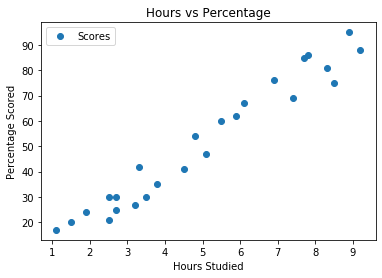

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

From the graph above, we can see that there is a linear relation between the number of hours studied and the percentage scored 

In [7]:
#divide the data to independent and dependent variables
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


The next step is to split this data into training and test sets using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# TRAINING THE ALGORITHM

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  #creating an object of linear regression

In [10]:
regressor.fit(X_train, y_train) #fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print("Training is completed.")

Training is completed.


VISUALIZING THE LINEAR REGRESSION

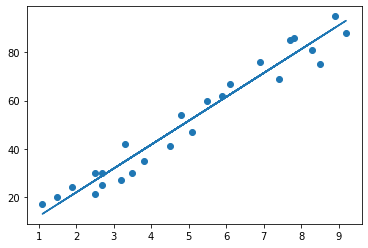

In [12]:
line = regressor.coef_ * X + regressor.intercept_

#plotting for testing the data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

WE HAVE TRAINED THE ALGORITHM. NOW,LET'S MAKE PREDICTIONS

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

y_pred is a numpy array that contains all the predicted values for the input values in the X_test.

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


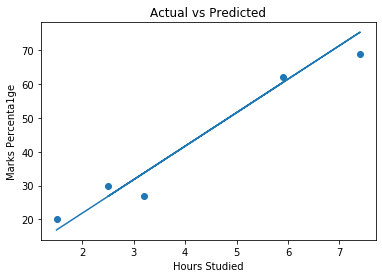

In [16]:
#Visualizing the predicted and actual values
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percenta1ge')
plt.xlabel('Hours Studied')
plt.show()


# EVALUATING THE MODEL

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692
